In [29]:
gradient = 2
offset   = 10
point_num = 20
train_num = 50000

In [30]:
import pylab as pl
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn.cross_validation as skcross
%pylab inline --no-import-all
from random import randint

np.set_printoptions(precision=5, suppress=True)

def GenerateRandomData(count, gradient, offset):
    x1 = np.linspace(1, 5, count)
    x2 = gradient*x1 + np.random.randint(-10,10,x1.shape[0])+offset
    dataset = []
    y = []
    for i in range(*x1.shape):
        dataset.append([x1[i], x2[i]])
        real_value = gradient*x1[i]+offset
        if real_value > x2[i]:
            y.append(-1)
        else:
            y.append(1)
    return x1,x2,np.mat(y),np.mat(dataset)

x, y, result, train_data = GenerateRandomData(point_num, gradient, offset)
x_t, y_t, test_real_result, test_data =  GenerateRandomData(100, gradient, offset)

print('x\n',np.shape(x))
print('y\n',np.shape(y))
print('result\n',np.shape(result))
print('train_data\n',np.shape(train_data))

Populating the interactive namespace from numpy and matplotlib
x
 (20,)
y
 (20,)
result
 (1, 20)
train_data
 (20, 2)


In [31]:
class SimplePerceptron:
    def __init__(self, train_data = [], real_result = [], eta = 1):
        self.w   =   np.zeros([1, train_data.shape[1]], int)
        self.b   =   0
        self.eta =   eta
        self.train_data   = train_data
        self.real_result  = real_result
    def nomalize(self, x):
        if x > 0 :
            return 1
        else :
            return -1
    def model(self, x):
        # Here are matrix dot multiply get one value
        y = np.dot(x, self.w.T) + self.b
        # Use sign to nomalize the result
        predict_v = self.nomalize(y)
        return predict_v, y
    def update(self, x, y):
        # w = w + n*y_i*x_i
        self.w = self.w + self.eta*y*x
        # b = b + n*y_i
        self.b = self.b + self.eta*y
    def loss(slef, fx, y):
        return fx.astype(int)*y

    def train(self, count):
        update_count = 0
        while count > 0:
            # count--
            count = count - 1

            if train_data.shape[0] <= 0:
                print("exception exit")
                break
            # random select one train data
            index = randint(0, train_data.shape[0]-1)
            x = self.train_data[index]
            y = self.real_result.T[index]
            # wx+b
            predict_v, linear_y_v = self.model(x)
            # y_i*(wx+b) > 0, the classify is correct, else it's error
            if self.loss(y, linear_y_v) > 0:
                continue
            update_count = update_count + 1
            self.update(x, y)
        print("update count: ", update_count)
        pass
    def verify(self, verify_data, verify_result):
        size = verify_data.shape[0]
        failed_count = 0
        if size <= 0:
            pass
        for i in range(size):
            x = verify_data[i]
            y = verify_result.T[i]
            if self.loss(y, self.model(x)[1]) > 0:
                continue
            failed_count = failed_count + 1
        success_rate = (1.0 - (float(failed_count)/size))*100
        print("Success Rate: ", success_rate, "%")
        print("All input: ", size, " failed_count: ", failed_count)

    def predict(self, predict_data):
        size = len(predict_data)
        result = []
        if size <= 0:
            pass
        for i in range(size):
            x = verify_data[i]
            y = verify_result.T[i]
            result.append(self.model(x)[0])
        return result

In [32]:
perceptron = SimplePerceptron(train_data, result)
perceptron.train(train_num)
perceptron.verify(test_data, test_real_result)
print("T1: w:", perceptron.w," b:", perceptron.b)

update count:  1176
Success Rate:  97.0 %
All input:  100  failed_count:  3
T1: w: [[-100.21053   36.57895]]  b: [[-292]]


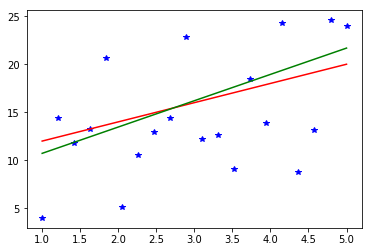

In [33]:
# Draw the figure
# 1. draw the (x,y) points
plt.plot(x, y, "*", color='blue')
# plt.plot(x_t, y_t, "+")
# 2. draw y=gradient*x+offset line
plt.plot(x,x.dot(gradient)+offset, color="red")
# 3. draw the line w_1*x_1 + w_2*x_2 + b = 0
plt.plot(x, -(x.dot(float(perceptron.w.T[0]))+float(perceptron.b))/float(perceptron.w.T[1])
         , color='green')
plt.show()

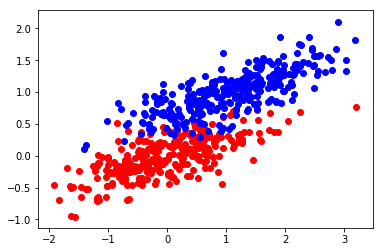

In [6]:
pl.scatter(X[y==0, 0], X[y==0, 1], c='r')
pl.scatter(X[y==1, 0], X[y==1, 1], c='b')

In [ ]:
# activation functions
def sign(X):
    if X > 0:
        return 1